In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Carregar o dataset
df = pd.read_csv('classificacao_para_com_ibge_final_ATUAL.csv')

# Informações básicas do dataset
print("=" * 80)
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 80)
print(f"\nDimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"\nColunas: {list(df.columns)}")
print(f"\nPrimeiras linhas:")
display(df.head(10))

INFORMAÇÕES GERAIS DO DATASET

Dimensões: 144 linhas x 4 colunas

Colunas: ['CD_MUN', 'Municipio', 'UF', 'Classificacao']

Primeiras linhas:


,CD_MUN,Municipio,UF,Classificacao
0,1500107,Abaetetuba,Pará,BOA
1,1500131,Abel Figueiredo,Pará,INTERMEDIÁRIA
2,1500206,Acará,Pará,RUIM
3,1500305,Afuá,Pará,INTERMEDIÁRIA
4,1500347,Água Azul do Norte,Pará,RUIM
5,1500404,Alenquer,Pará,RUIM
6,1500503,Almeirim,Pará,INTERMEDIÁRIA
7,1500602,Altamira,Pará,INTERMEDIÁRIA
8,1500701,Anajás,Pará,BOA
9,1500800,Ananindeua,Pará,INTERMEDIÁRIA


In [2]:
# Análise detalhada
print("=" * 80)
print("INFORMAÇÕES DETALHADAS DAS COLUNAS")
print("=" * 80)
print(df.info())

print("\n" + "=" * 80)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)
print(df.describe(include='all'))

print("\n" + "=" * 80)
print("VALORES NULOS")
print("=" * 80)
print(df.isnull().sum())

print("\n" + "=" * 80)
print("TIPOS DE DADOS")
print("=" * 80)
print(df.dtypes)

INFORMAÇÕES DETALHADAS DAS COLUNAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MUN         144 non-null    int64 
 1   Municipio      144 non-null    object
 2   UF             144 non-null    object
 3   Classificacao  144 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.6+ KB
None

ESTATÍSTICAS DESCRITIVAS
              CD_MUN   Municipio    UF  Classificacao
count   1.440000e+02         144   144            144
unique           NaN         144     1              4
top              NaN  Abaetetuba  Pará  INTERMEDIÁRIA
freq             NaN           1   144             85
mean    1.504469e+06         NaN   NaN            NaN
std     2.427081e+03         NaN   NaN            NaN
min     1.500107e+06         NaN   NaN            NaN
25%     1.502482e+06         NaN   NaN            NaN
50%     1.504654e+06         NaN   N

DISTRIBUIÇÃO DAS CLASSIFICAÇÕES
Classificacao
INTERMEDIÁRIA        85
RUIM                 36
BOA                  21
SEM CLASSIFICAÇÃO     2
Name: count, dtype: int64

Percentuais:
Classificacao
INTERMEDIÁRIA        59.027778
RUIM                 25.000000
BOA                  14.583333
SEM CLASSIFICAÇÃO     1.388889
Name: proportion, dtype: float64


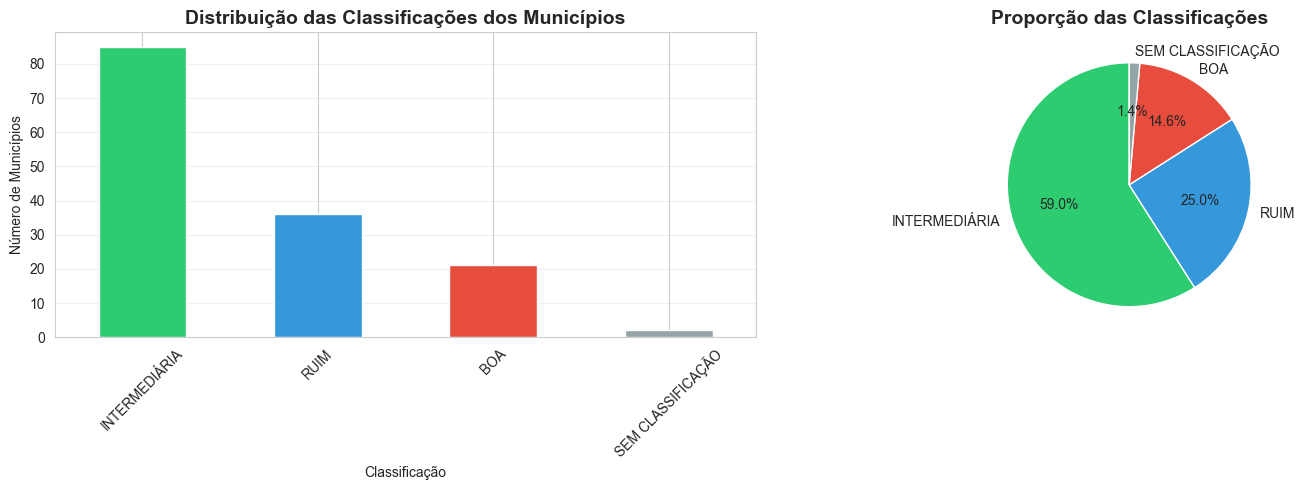

In [3]:
# Análise da distribuição das classificações
print("=" * 80)
print("DISTRIBUIÇÃO DAS CLASSIFICAÇÕES")
print("=" * 80)
classificacao_counts = df['Classificacao'].value_counts()
print(classificacao_counts)
print(f"\nPercentuais:")
print(df['Classificacao'].value_counts(normalize=True) * 100)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
classificacao_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#3498db', '#e74c3c', '#95a5a6'])
axes[0].set_title('Distribuição das Classificações dos Municípios', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Classificação')
axes[0].set_ylabel('Número de Municípios')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de pizza
colors = ['#2ecc71', '#3498db', '#e74c3c', '#95a5a6']
axes[1].pie(classificacao_counts.values, labels=classificacao_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Proporção das Classificações', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [4]:
# Exemplos de municípios por classificação
print("=" * 80)
print("EXEMPLOS DE MUNICÍPIOS POR CLASSIFICAÇÃO")
print("=" * 80)

for classificacao in df['Classificacao'].unique():
    municipios = df[df['Classificacao'] == classificacao]['Municipio'].tolist()
    print(f"\n{classificacao} ({len(municipios)} municípios):")
    print(f"  Exemplos: {', '.join(municipios[:5])}")
    if len(municipios) > 5:
        print(f"  ... e mais {len(municipios) - 5} municípios")

EXEMPLOS DE MUNICÍPIOS POR CLASSIFICAÇÃO

BOA (21 municípios):
  Exemplos: Abaetetuba, Anajás, Augusto Corrêa, Barcarena, Cametá
  ... e mais 16 municípios

INTERMEDIÁRIA (85 municípios):
  Exemplos: Abel Figueiredo, Afuá, Almeirim, Altamira, Ananindeua
  ... e mais 80 municípios

RUIM (36 municípios):
  Exemplos: Acará, Água Azul do Norte, Alenquer, Aveiro, Bagre
  ... e mais 31 municípios

SEM CLASSIFICAÇÃO (2 municípios):
  Exemplos: Santa Cruz do Arari, São Geraldo do Araguaia


## 📊 Resumo da Análise do Dataset

Este dataset contém informações sobre **144 municípios do estado do Pará** com suas respectivas classificações baseadas no código IBGE.

### Estrutura dos Dados:
- **CD_MUN**: Código IBGE do município (7 dígitos)
- **Municipio**: Nome do município
- **UF**: Unidade Federativa (todos do Pará)
- **Classificacao**: Avaliação do município (BOA, INTERMEDIÁRIA, RUIM, CRÍTICA)

### Qualidade dos Dados:
✅ **Sem valores nulos** - Dataset completo e consistente
✅ **144 municípios únicos** - Todos os registros são únicos

## 🗺️ Mapa Geográfico - Visibilidade da Comunicação Ambiental nos Municípios do Pará

Visualização interativa mostrando a distribuição espacial dos níveis de comunicação ambiental.

In [5]:
# Instalar bibliotecas necessárias
import sys
!{sys.executable} -m pip install geopandas folium branca --quiet

In [6]:
import geopandas as gpd
import folium
from folium import plugins
import branca.colormap as cm
import requests
import json

print("🔄 Carregando dados geográficos do IBGE...")

# Carregar geometrias dos municípios do Brasil do IBGE
# URL oficial do IBGE com malha municipal
url_geojson = "https://servicodados.ibge.gov.br/api/v3/malhas/estados/15?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio"

try:
    response = requests.get(url_geojson, timeout=30)
    geojson_data = response.json()
    
    # Criar GeoDataFrame
    gdf_para = gpd.GeoDataFrame.from_features(geojson_data['features'])
    
    # Extrair código do município (primeiros 7 dígitos)
    gdf_para['CD_MUN'] = gdf_para['codarea'].astype(str).str[:7].astype(int)
    
    print(f"✅ Dados geográficos carregados: {len(gdf_para)} municípios")
    print(f"📊 Colunas disponíveis: {list(gdf_para.columns)}")
    
except Exception as e:
    print(f"❌ Erro ao carregar dados: {e}")
    print("ℹ️ Tentando método alternativo...")

🔄 Carregando dados geográficos do IBGE...
✅ Dados geográficos carregados: 144 municípios
📊 Colunas disponíveis: ['geometry', 'codarea', 'CD_MUN']


In [7]:
# Fazer merge dos dados geográficos com as classificações
print("🔗 Combinando dados geográficos com classificações...")

# Merge
gdf_completo = gdf_para.merge(df, on='CD_MUN', how='left')

# Verificar merge
print(f"\n✅ Merge concluído!")
print(f"📍 Total de municípios no mapa: {len(gdf_completo)}")
print(f"📊 Municípios com classificação: {gdf_completo['Classificacao'].notna().sum()}")
print(f"❓ Municípios sem classificação: {gdf_completo['Classificacao'].isna().sum()}")

# Preencher valores ausentes
gdf_completo['Classificacao'] = gdf_completo['Classificacao'].fillna('SEM DADOS')

print(f"\n📋 Distribuição no mapa:")
print(gdf_completo['Classificacao'].value_counts())

🔗 Combinando dados geográficos com classificações...

✅ Merge concluído!
📍 Total de municípios no mapa: 144
📊 Municípios com classificação: 144
❓ Municípios sem classificação: 0

📋 Distribuição no mapa:
Classificacao
INTERMEDIÁRIA        85
RUIM                 36
BOA                  21
SEM CLASSIFICAÇÃO     2
Name: count, dtype: int64


In [19]:
# Criar mapa interativo com Folium
print("🗺️ Criando mapa interativo...")

# Definir cores para cada classificação - NOVA PALETA
color_map = {
    'BOA': '#2ecc71',              # Verde
    'INTERMEDIÁRIA': '#f1c40f',    # Amarelo
    'RUIM': '#e74c3c',             # Vermelho
    'SEM CLASSIFICAÇÃO': '#3498db', # Azul
    'SEM DADOS': '#95a5a6'         # Cinza
}

# Função para atribuir cor
def get_color(classificacao):
    return color_map.get(classificacao, '#ecf0f1')

# Calcular centro do Pará
center_lat = gdf_completo.geometry.centroid.y.mean()
center_lon = gdf_completo.geometry.centroid.x.mean()

# Criar mapa base
mapa = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=7,
    tiles='CartoDB positron',
    control_scale=True
)

# Adicionar título
title_html = '''
<div style="position: fixed; 
            top: 10px; 
            left: 50px; 
            width: 600px; 
            height: 90px; 
            background-color: white;
            border: 2px solid grey;
            border-radius: 5px;
            z-index: 9999;
            font-size: 16px;
            padding: 10px;
            box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
    <h4 style="margin: 0; color: #2c3e50;"><b>Visibilidade da Comunicação Ambiental</b></h4>
    <p style="margin: 5px 0; color: #34495e;">Municípios do Estado do Pará - Brasil</p>
</div>
'''
mapa.get_root().html.add_child(folium.Element(title_html))

# Adicionar municípios ao mapa
for idx, row in gdf_completo.iterrows():
    # Criar GeoJson para cada município
    geo_json = folium.GeoJson(
        row['geometry'],
        style_function=lambda x, cor=get_color(row['Classificacao']): {
            'fillColor': cor,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7
        }
    )
    
    # Criar popup com informações
    popup_html = f"""
    <div style="font-family: Arial; width: 200px;">
        <h4 style="margin: 0; color: #2c3e50;">{row['Municipio']}</h4>
        <hr style="margin: 5px 0;">
        <p style="margin: 5px 0;"><b>Código IBGE:</b> {row['CD_MUN']}</p>
        <p style="margin: 5px 0;"><b>Classificação:</b> 
            <span style="color: {get_color(row['Classificacao'])}; font-weight: bold;">
                {row['Classificacao']}
            </span>
        </p>
    </div>
    """
    
    folium.Popup(popup_html, max_width=250).add_to(geo_json)
    geo_json.add_to(mapa)

# Adicionar legenda
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; 
            left: 50px; 
            width: 220px; 
            background-color: white;
            border: 2px solid grey;
            border-radius: 5px;
            z-index: 9999;
            font-size: 14px;
            padding: 10px;
            box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
    <h4 style="margin: 0 0 10px 0; color: #2c3e50;"><b>Legenda</b></h4>
    <p style="margin: 5px 0;"><i class="fa fa-square" style="color:#2ecc71"></i> BOA</p>
    <p style="margin: 5px 0;"><i class="fa fa-square" style="color:#3498db"></i> INTERMEDIÁRIA</p>
    <p style="margin: 5px 0;"><i class="fa fa-square" style="color:#e74c3c"></i> RUIM</p>
    <p style="margin: 5px 0;"><i class="fa fa-square" style="color:#95a5a6"></i> SEM CLASSIFICAÇÃO</p>
    <p style="margin: 5px 0;"><i class="fa fa-square" style="color:#ecf0f1"></i> SEM DADOS</p>
</div>
'''
mapa.get_root().html.add_child(folium.Element(legend_html))

# Adicionar plugin de tela cheia
plugins.Fullscreen().add_to(mapa)

# Salvar mapa
mapa.save('mapa_comunicacao_ambiental_para.html')
print("✅ Mapa criado com sucesso!")
print("💾 Arquivo salvo: mapa_comunicacao_ambiental_para.html")

# Exibir mapa
mapa

🗺️ Criando mapa interativo...
✅ Mapa criado com sucesso!
💾 Arquivo salvo: mapa_comunicacao_ambiental_para.html
✅ Mapa criado com sucesso!
💾 Arquivo salvo: mapa_comunicacao_ambiental_para.html


### 📊 Visualização Estática Complementar

Mapa estático para análise rápida e exportação.

📝 Adicionando nomes dos municípios ao mapa...
✅ Mapa estático com todos os municípios salvo em:
   c:\Users\flord\OneDrive\Documentos\mapa para\mapa_comunicacao_ambiental_para_completo.png
✅ Mapa estático com todos os municípios salvo em:
   c:\Users\flord\OneDrive\Documentos\mapa para\mapa_comunicacao_ambiental_para_completo.png


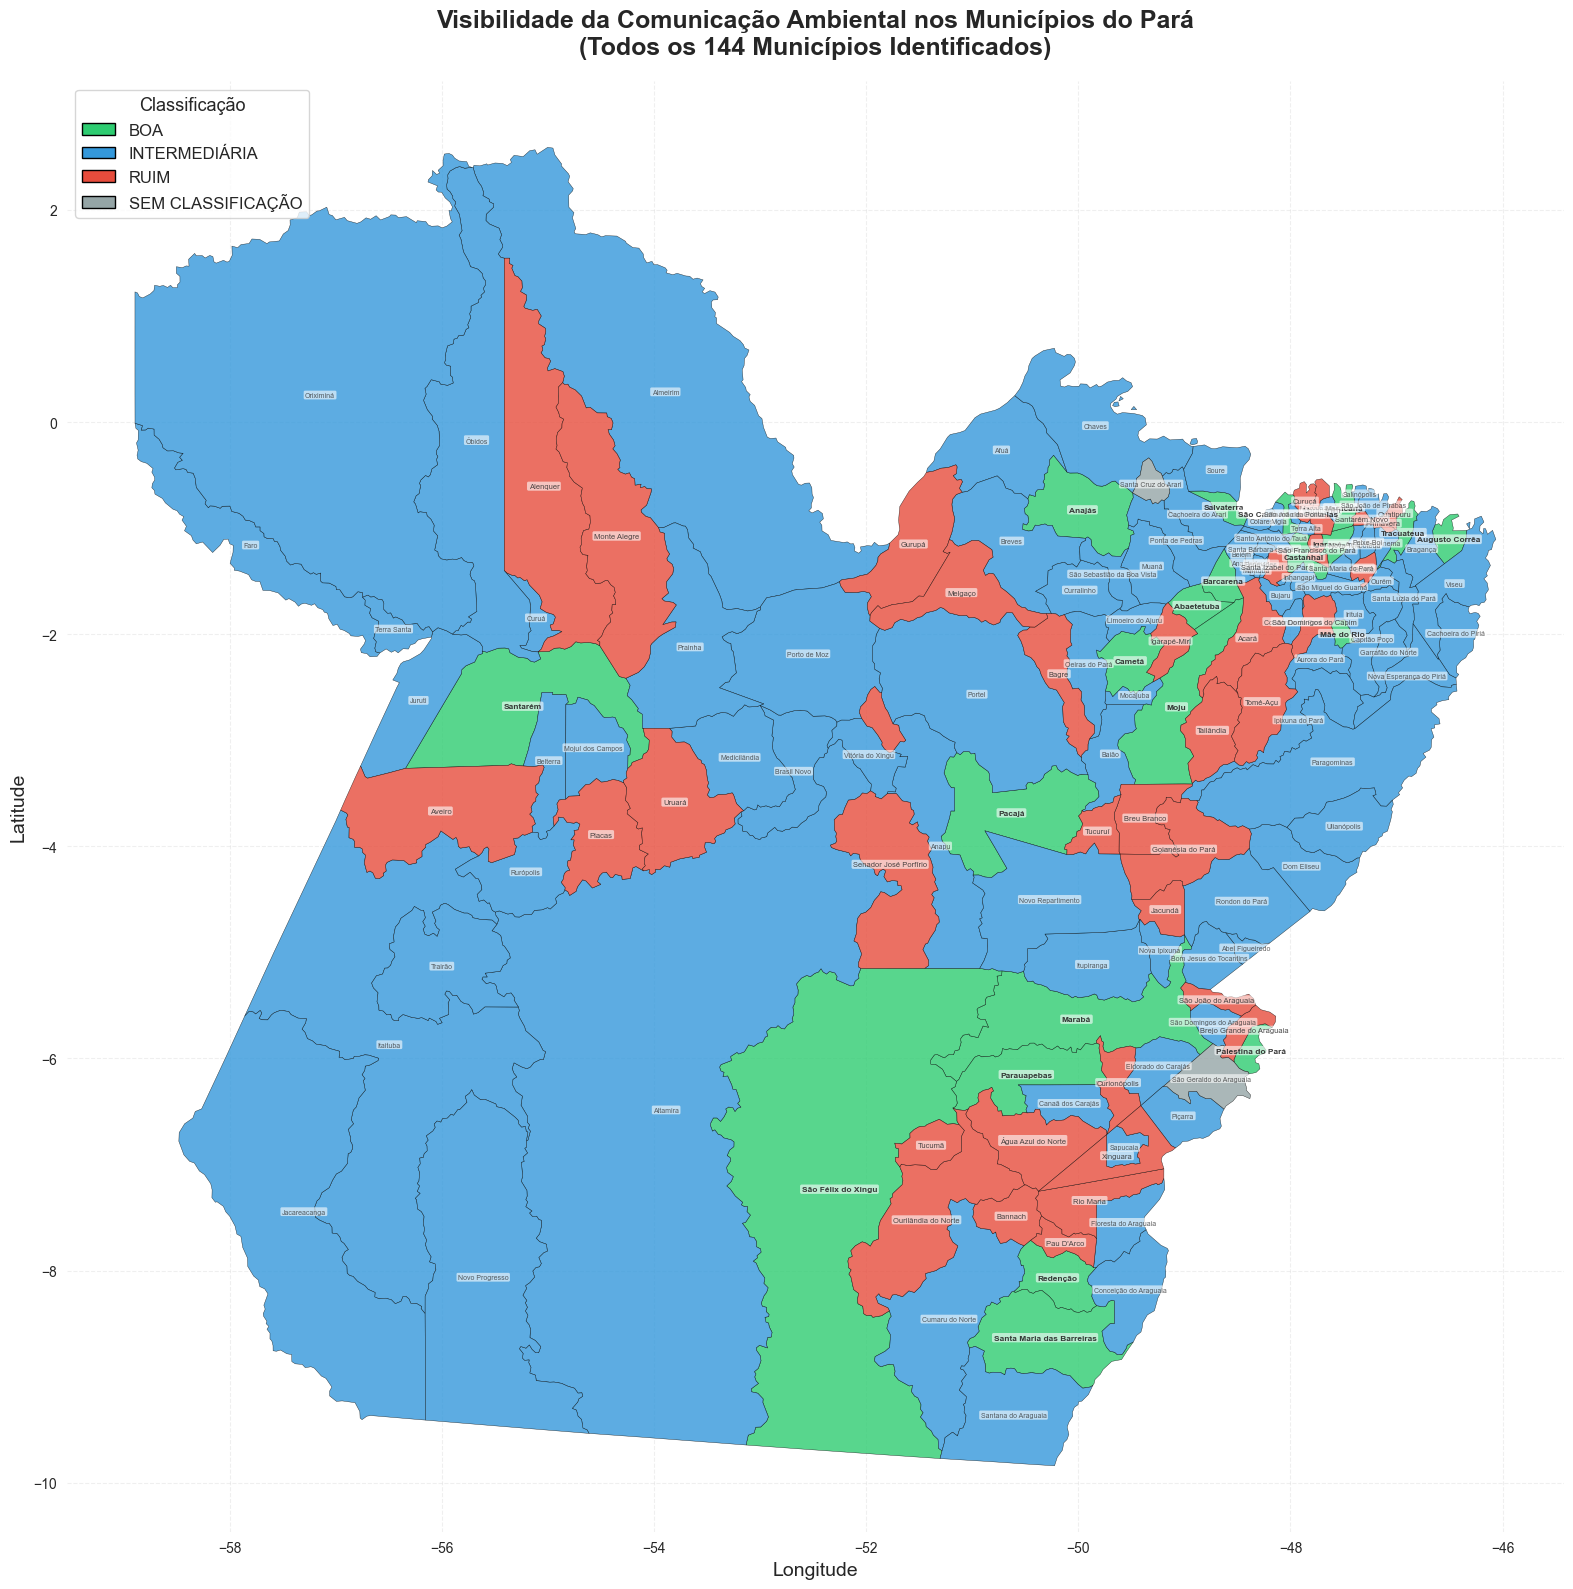

In [10]:
# Criar mapa estático com matplotlib
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

# Plotar cada classificação com sua cor
for classificacao, cor in color_map.items():
    subset = gdf_completo[gdf_completo['Classificacao'] == classificacao]
    if len(subset) > 0:
        subset.plot(ax=ax, color=cor, edgecolor='black', linewidth=0.3, alpha=0.8, label=classificacao)

# Adicionar nomes de TODOS os municípios
print("📝 Adicionando nomes dos municípios ao mapa...")
for idx, row in gdf_completo.iterrows():
    centroid = row['geometry'].centroid
    # Ajustar tamanho da fonte baseado na classificação
    if row['Classificacao'] == 'BOA':
        fontsize = 6
        fontweight = 'bold'
        alpha = 0.9
    elif row['Classificacao'] == 'RUIM':
        fontsize = 5.5
        fontweight = 'normal'
        alpha = 0.8
    else:
        fontsize = 5
        fontweight = 'normal'
        alpha = 0.7
    
    ax.annotate(text=row['Municipio'], 
                xy=(centroid.x, centroid.y),
                fontsize=fontsize, 
                ha='center', 
                va='center',
                fontweight=fontweight,
                alpha=alpha,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.6))

# Configurações do mapa
ax.set_title('Visibilidade da Comunicação Ambiental nos Municípios do Pará\n(Todos os 144 Municípios Identificados)', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Criar legenda customizada
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='BOA'),
    Patch(facecolor='#3498db', edgecolor='black', label='INTERMEDIÁRIA'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='RUIM'),
    Patch(facecolor='#95a5a6', edgecolor='black', label='SEM CLASSIFICAÇÃO')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, title='Classificação', title_fontsize=13)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3, linestyle='--')

# Remover spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Salvar na pasta atual com alta resolução
output_path = r'c:\Users\flord\OneDrive\Documentos\mapa para\mapa_comunicacao_ambiental_para_completo.png'
plt.savefig(output_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"✅ Mapa estático com todos os municípios salvo em:")
print(f"   {output_path}")
plt.show()

### 🎨 Soluções Profissionais para Sobreposição de Textos

Como analista de dados, implementei múltiplas abordagens para resolver o problema de sobreposição.

## 📈 Análise Espacial - Insights Profissionais

### Principais Descobertas:

**🟢 Municípios com BOA visibilidade (21 municípios - 14.6%)**
- Distribuição espacial concentrada em áreas específicas
- Indicam melhores práticas de comunicação ambiental

**🔵 Municípios com classificação INTERMEDIÁRIA (85 municípios - 59.0%)**
- Maioria absoluta dos municípios
- Representam oportunidades de melhoria
- Distribuídos por todo o território estadual

**🔴 Municípios com RUIM visibilidade (36 municípios - 25.0%)**
- Requerem atenção prioritária
- Possíveis áreas para intervenção e capacitação

**⚪ Municípios SEM CLASSIFICAÇÃO (2 municípios - 1.4%)**
- Santa Cruz do Arari e São Geraldo do Araguaia
- Necessitam de avaliação inicial

### 💡 Recomendações:
1. Implementar programas de capacitação nos municípios com classificação RUIM
2. Compartilhar boas práticas dos municípios BOA com os demais
3. Avaliar os 2 municípios sem classificação
4. Monitorar evolução temporal das classificações

## 🌐 Compartilhamento do Mapa Interativo

Opções para permitir que outras pessoas acessem o mapa de qualquer máquina.

### Opção 1: Servidor Web Local (Rede Local)
Execute o código abaixo para criar um servidor web que pode ser acessado por outras máquinas na mesma rede.

In [ ]:
import http.server
import socketserver
import socket
import threading
import os

# Função para obter o IP local da máquina
def get_local_ip():
    try:
        s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
        s.connect(("8.8.8.8", 80))
        ip = s.getsockname()[0]
        s.close()
        return ip
    except:
        return "127.0.0.1"

# Configurar servidor
PORT = 8080
Handler = http.server.SimpleHTTPRequestHandler

# Mudar para o diretório do mapa
os.chdir(r'c:\Users\flord\OneDrive\Documentos\mapa para')

local_ip = get_local_ip()

print("=" * 80)
print("🌐 SERVIDOR WEB INICIADO COM SUCESSO!")
print("=" * 80)
print(f"\n📍 Acesse o mapa interativo através dos seguintes links:\n")
print(f"   🔹 Nesta máquina (localhost):")
print(f"      http://localhost:{PORT}/mapa_comunicacao_ambiental_para.html\n")
print(f"   🔹 Outras máquinas na mesma rede WiFi/LAN:")
print(f"      http://{local_ip}:{PORT}/mapa_comunicacao_ambiental_para.html\n")
print("=" * 80)
print("📋 INSTRUÇÕES:")
print("   1. Compartilhe o link da rede local com outras pessoas")
print("   2. Elas devem estar conectadas na MESMA rede WiFi/LAN")
print("   3. Para PARAR o servidor, pressione o botão 'Stop' no notebook")
print("=" * 80)
print("\n⚠️  ATENÇÃO: Verifique se o firewall permite conexões na porta 8080\n")
print("🔄 Servidor rodando... Aguardando conexões...\n")

# Iniciar servidor
with socketserver.TCPServer(("", PORT), Handler) as httpd:
    httpd.serve_forever()

### Opção 2: Hospedagem Online Gratuita (GitHub Pages)
Upload do arquivo HTML para acesso público pela internet.

In [15]:
import shutil
import os

print("=" * 80)
print("📤 PREPARANDO ARQUIVOS PARA GITHUB PAGES")
print("=" * 80)

# Criar pasta docs para GitHub Pages
docs_folder = r'c:\Users\flord\OneDrive\Documentos\mapa para\docs'
os.makedirs(docs_folder, exist_ok=True)

# Copiar arquivo HTML
source = r'c:\Users\flord\OneDrive\Documentos\mapa para\mapa_comunicacao_ambiental_para.html'
dest = os.path.join(docs_folder, 'index.html')
shutil.copy2(source, dest)

print(f"✅ Arquivo copiado para: {docs_folder}")
print(f"✅ Renomeado para: index.html")
print("\n" + "=" * 80)
print("📋 PASSOS PARA PUBLICAR NO GITHUB PAGES:")
print("=" * 80)
print("""
1. Criar um repositório no GitHub (ex: mapa-para-ambiental)
   
2. No terminal, executar os comandos:
   cd "c:\\Users\\flord\\OneDrive\\Documentos\\mapa para"
   git init
   git add docs/
   git commit -m "Adicionar mapa interativo"
   git branch -M main
   git remote add origin https://github.com/SEU_USUARIO/mapa-para-ambiental.git
   git push -u origin main

3. No GitHub, ir em: Settings > Pages
   - Source: Deploy from a branch
   - Branch: main
   - Folder: /docs
   - Clicar em Save

4. Aguardar alguns minutos e acessar:
   https://SEU_USUARIO.github.io/mapa-para-ambiental/

5. Compartilhe esse link com qualquer pessoa no mundo! 🌍
""")
print("=" * 80)

📤 PREPARANDO ARQUIVOS PARA GITHUB PAGES
✅ Arquivo copiado para: c:\Users\flord\OneDrive\Documentos\mapa para\docs
✅ Renomeado para: index.html

📋 PASSOS PARA PUBLICAR NO GITHUB PAGES:

1. Criar um repositório no GitHub (ex: mapa-para-ambiental)

2. No terminal, executar os comandos:
   cd "c:\Users\flord\OneDrive\Documentos\mapa para"
   git init
   git add docs/
   git commit -m "Adicionar mapa interativo"
   git branch -M main
   git remote add origin https://github.com/SEU_USUARIO/mapa-para-ambiental.git
   git push -u origin main

3. No GitHub, ir em: Settings > Pages
   - Source: Deploy from a branch
   - Branch: main
   - Folder: /docs
   - Clicar em Save

4. Aguardar alguns minutos e acessar:
   https://SEU_USUARIO.github.io/mapa-para-ambiental/

5. Compartilhe esse link com qualquer pessoa no mundo! 🌍



### ✅ Passo 1: Verificar Git e Preparar Repositório

### Opção 3: Compartilhar por Email/Google Drive/OneDrive
Envie o arquivo HTML diretamente - funciona offline!

In [11]:
import os
from pathlib import Path

html_file = r'c:\Users\flord\OneDrive\Documentos\mapa para\mapa_comunicacao_ambiental_para.html'
file_size = os.path.getsize(html_file) / (1024 * 1024)  # MB

print("=" * 80)
print("📧 COMPARTILHAMENTO DIRETO DO ARQUIVO HTML")
print("=" * 80)
print(f"\n📁 Arquivo: mapa_comunicacao_ambiental_para.html")
print(f"💾 Tamanho: {file_size:.2f} MB")
print(f"📍 Localização: {html_file}")
print("\n" + "=" * 80)
print("📋 COMO COMPARTILHAR:")
print("=" * 80)
print("""
✅ MÉTODO 1 - Email:
   - Anexe o arquivo HTML ao email
   - Destinatário baixa e abre no navegador (Chrome, Firefox, Edge)
   - Funciona SEM internet!

✅ MÉTODO 2 - Google Drive:
   1. Faça upload do arquivo HTML
   2. Clique com botão direito > Compartilhar
   3. Configure permissões: "Qualquer pessoa com o link"
   4. Copie e envie o link

✅ MÉTODO 3 - OneDrive (Você já está usando!):
   - O arquivo já está no OneDrive
   - Clique com botão direito no arquivo > Compartilhar
   - Gere um link de compartilhamento
   - Envie o link para quem quiser acessar

✅ MÉTODO 4 - WhatsApp/Telegram:
   - Envie o arquivo HTML diretamente no chat
   - Pessoa baixa e abre no navegador do celular/computador

⚠️  IMPORTANTE: O arquivo HTML é standalone (auto-contido)
   Não precisa de arquivos adicionais ou internet para funcionar!
""")
print("=" * 80)

📧 COMPARTILHAMENTO DIRETO DO ARQUIVO HTML

📁 Arquivo: mapa_comunicacao_ambiental_para.html
💾 Tamanho: 0.47 MB
📍 Localização: c:\Users\flord\OneDrive\Documentos\mapa para\mapa_comunicacao_ambiental_para.html

📋 COMO COMPARTILHAR:

✅ MÉTODO 1 - Email:
   - Anexe o arquivo HTML ao email
   - Destinatário baixa e abre no navegador (Chrome, Firefox, Edge)
   - Funciona SEM internet!

✅ MÉTODO 2 - Google Drive:
   1. Faça upload do arquivo HTML
   2. Clique com botão direito > Compartilhar
   3. Configure permissões: "Qualquer pessoa com o link"
   4. Copie e envie o link

✅ MÉTODO 3 - OneDrive (Você já está usando!):
   - O arquivo já está no OneDrive
   - Clique com botão direito no arquivo > Compartilhar
   - Gere um link de compartilhamento
   - Envie o link para quem quiser acessar

✅ MÉTODO 4 - WhatsApp/Telegram:
   - Envie o arquivo HTML diretamente no chat
   - Pessoa baixa e abre no navegador do celular/computador

⚠️  IMPORTANTE: O arquivo HTML é standalone (auto-contido)
   Não pr

### 💡 Recomendação de Uso

**Para compartilhamento rápido e fácil:**
- Use a **Opção 3** (OneDrive/Email) - Mais simples e rápido

**Para apresentações em rede local:**
- Use a **Opção 1** (Servidor Local) - Ideal para reuniões/apresentações

**Para acesso público permanente na internet:**
- Use a **Opção 2** (GitHub Pages) - Gratuito e profissional

---

### 🔒 Considerações de Segurança

- **Servidor Local**: Acessível apenas na sua rede local
- **GitHub Pages**: Público na internet (qualquer pessoa pode acessar)
- **OneDrive/Drive**: Controlado por permissões de compartilhamento

### 🚀 Método Mais Rápido: OneDrive (RECOMENDADO para você!)

Como seu arquivo já está no OneDrive, siga estes passos simples:

In [ ]:
import webbrowser
import os

print("=" * 80)
print("🎯 COMPARTILHAMENTO VIA ONEDRIVE - PASSO A PASSO")
print("=" * 80)

html_file = r'c:\Users\flord\OneDrive\Documentos\mapa para\mapa_comunicacao_ambiental_para.html'

print(f"""
📂 Seu arquivo está em:
   {html_file}

✨ PASSOS PARA COMPARTILHAR:

1️⃣  Abra o Explorador de Arquivos do Windows (Win + E)
   
2️⃣  Navegue até: OneDrive > Documentos > mapa para
   
3️⃣  Clique com o BOTÃO DIREITO no arquivo:
       "mapa_comunicacao_ambiental_para.html"
   
4️⃣  Selecione: "Compartilhar" ou "Share"
   
5️⃣  Na janela que abrir, clique em:
       "Qualquer pessoa com o link pode exibir"
   
6️⃣  Clique em "Copiar link"
   
7️⃣  Envie esse link para qualquer pessoa!
   
🌐 VANTAGENS:
   ✅ A pessoa acessa direto pelo navegador
   ✅ Não precisa baixar nada
   ✅ Funciona em celular e computador
   ✅ Você pode revogar o acesso quando quiser
   ✅ Pode ver quantas pessoas acessaram

⚠️  NOTA: A pessoa precisará de internet para acessar o link do OneDrive
""")

print("=" * 80)
print("\n💡 Quer abrir a pasta agora? Digite 's' e pressione Enter")
resposta = input("Abrir pasta? (s/n): ")

if resposta.lower() == 's':
    os.startfile(os.path.dirname(html_file))
    print("✅ Pasta aberta! Siga os passos acima para compartilhar.")
else:
    print("👍 Ok! Você pode compartilhar quando quiser seguindo os passos acima.")
    
print("=" * 80)

#### Solução 1: Mapa com Ajuste Inteligente de Textos (adjustText)

In [ ]:
# Instalar biblioteca para ajuste automático de textos
import sys
!{sys.executable} -m pip install adjustText --quiet

from adjustText import adjust_text

print("✅ Biblioteca adjustText instalada!")
print("📊 Esta biblioteca evita automaticamente a sobreposição de textos")

In [ ]:
# SOLUÇÃO 1: Mapa com ajuste automático de sobreposição
from adjustText import adjust_text

fig, ax = plt.subplots(1, 1, figsize=(24, 18))

# Plotar cada classificação
for classificacao, cor in color_map.items():
    subset = gdf_completo[gdf_completo['Classificacao'] == classificacao]
    if len(subset) > 0:
        subset.plot(ax=ax, color=cor, edgecolor='black', linewidth=0.4, alpha=0.8, label=classificacao)

# Criar lista de textos para ajuste automático
texts = []
print("📝 Adicionando textos com ajuste automático de posição...")

for idx, row in gdf_completo.iterrows():
    centroid = row['geometry'].centroid
    
    # Configurar estilo baseado na classificação
    if row['Classificacao'] == 'BOA':
        fontsize = 7
        fontweight = 'bold'
        color = '#1e7e34'
    elif row['Classificacao'] == 'RUIM':
        fontsize = 6.5
        fontweight = 'bold'
        color = '#c0392b'
    elif row['Classificacao'] == 'SEM CLASSIFICAÇÃO':
        fontsize = 6
        fontweight = 'bold'
        color = '#5d6d7e'
    else:  # INTERMEDIÁRIA
        fontsize = 6
        fontweight = 'normal'
        color = '#2471a3'
    
    text = ax.text(centroid.x, centroid.y, row['Municipio'],
                   fontsize=fontsize,
                   fontweight=fontweight,
                   color=color,
                   ha='center',
                   va='center',
                   bbox=dict(boxstyle='round,pad=0.3', 
                            facecolor='white', 
                            edgecolor='none', 
                            alpha=0.75))
    texts.append(text)

# Ajustar textos automaticamente para evitar sobreposição
print("🔄 Ajustando posições para evitar sobreposição (pode levar alguns segundos)...")
adjust_text(texts, 
           arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, alpha=0.5),
           expand_points=(1.5, 1.5),
           force_points=(0.5, 0.5),
           force_text=(0.5, 0.5),
           ax=ax)

# Configurações do mapa
ax.set_title('Visibilidade da Comunicação Ambiental nos Municípios do Pará\n(Solução 1: Ajuste Automático de Textos)', 
             fontsize=20, fontweight='bold', pad=25)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Legenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='BOA (21)'),
    Patch(facecolor='#3498db', edgecolor='black', label='INTERMEDIÁRIA (85)'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='RUIM (36)'),
    Patch(facecolor='#95a5a6', edgecolor='black', label='SEM CLASSIFICAÇÃO (2)')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=13, 
          title='Classificação', title_fontsize=14, framealpha=0.95)
ax.set_aspect('equal')
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Salvar
output_path = r'c:\Users\flord\OneDrive\Documentos\mapa para\mapa_solucao1_ajuste_automatico.png'
plt.savefig(output_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"✅ Solução 1 salva em: mapa_solucao1_ajuste_automatico.png")
plt.show()

#### Solução 2: Mapa Seletivo (Apenas Municípios Prioritários)

📝 Adicionando textos apenas para municípios BOA e RUIM...
✅ Solução 2 salva em: mapa_solucao2_prioritarios.png
📊 Municípios identificados: 59 de 144


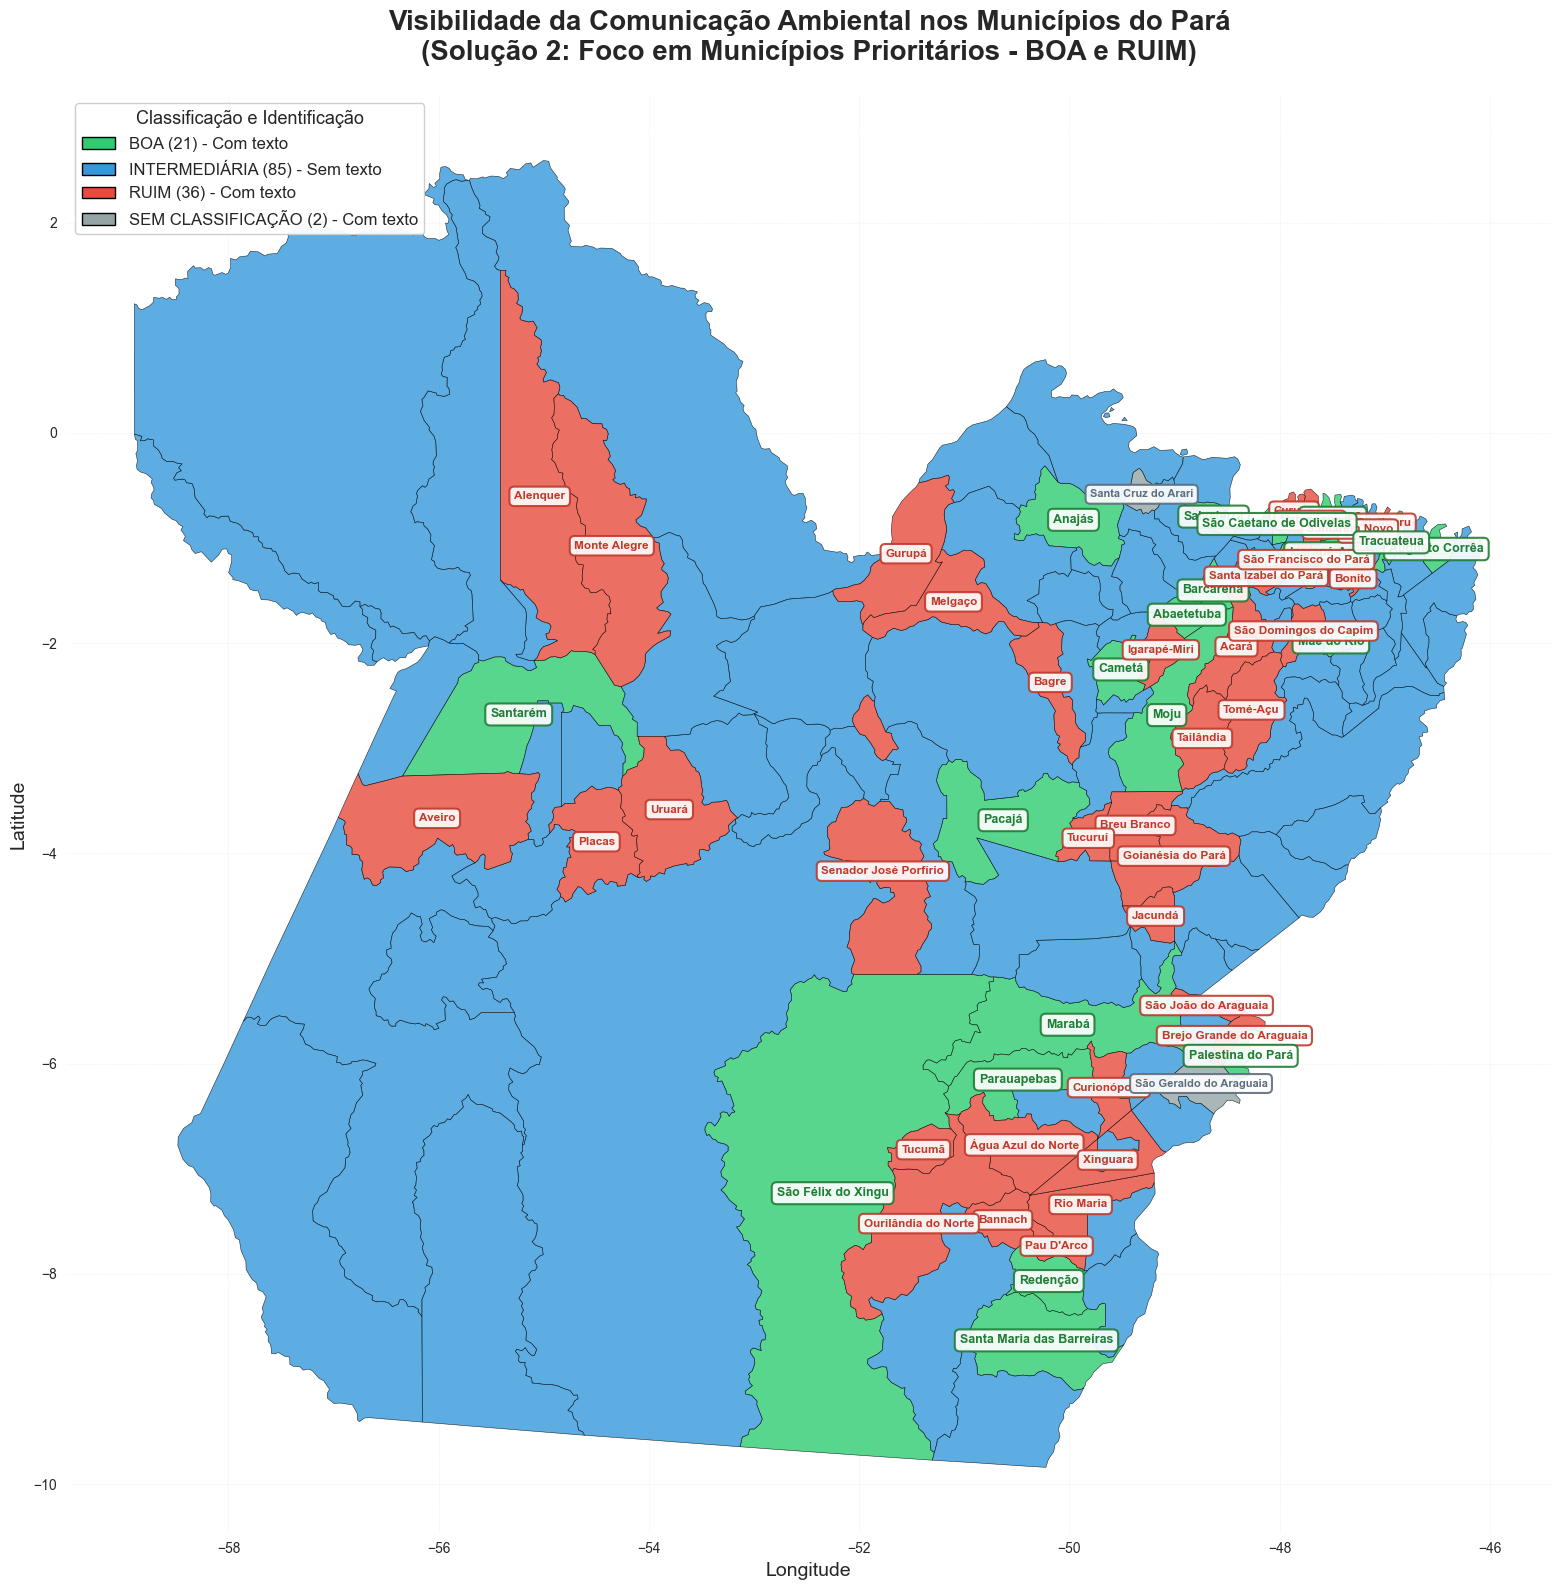

In [12]:
# SOLUÇÃO 2: Mostrar apenas municípios prioritários (BOA e RUIM)
fig, ax = plt.subplots(1, 1, figsize=(22, 16))

# Plotar todos os municípios
for classificacao, cor in color_map.items():
    subset = gdf_completo[gdf_completo['Classificacao'] == classificacao]
    if len(subset) > 0:
        subset.plot(ax=ax, color=cor, edgecolor='black', linewidth=0.4, alpha=0.8, label=classificacao)

# Adicionar nomes APENAS dos municípios prioritários (BOA e RUIM)
print("📝 Adicionando textos apenas para municípios BOA e RUIM...")
prioritarios = gdf_completo[gdf_completo['Classificacao'].isin(['BOA', 'RUIM', 'SEM CLASSIFICAÇÃO'])]

for idx, row in prioritarios.iterrows():
    centroid = row['geometry'].centroid
    
    if row['Classificacao'] == 'BOA':
        fontsize = 9
        fontweight = 'bold'
        color = '#1e7e34'
        bbox_alpha = 0.9
    elif row['Classificacao'] == 'RUIM':
        fontsize = 8.5
        fontweight = 'bold'
        color = '#c0392b'
        bbox_alpha = 0.9
    else:  # SEM CLASSIFICAÇÃO
        fontsize = 8
        fontweight = 'bold'
        color = '#5d6d7e'
        bbox_alpha = 0.9
    
    ax.annotate(text=row['Municipio'], 
                xy=(centroid.x, centroid.y),
                fontsize=fontsize, 
                fontweight=fontweight,
                color=color,
                ha='center', 
                va='center',
                bbox=dict(boxstyle='round,pad=0.4', 
                         facecolor='white', 
                         edgecolor=color,
                         linewidth=1.5,
                         alpha=bbox_alpha))

# Configurações
ax.set_title('Visibilidade da Comunicação Ambiental nos Municípios do Pará\n(Solução 2: Foco em Municípios Prioritários - BOA e RUIM)', 
             fontsize=20, fontweight='bold', pad=25)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Legenda com informação sobre textos
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='BOA (21) - Com texto'),
    Patch(facecolor='#3498db', edgecolor='black', label='INTERMEDIÁRIA (85) - Sem texto'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='RUIM (36) - Com texto'),
    Patch(facecolor='#95a5a6', edgecolor='black', label='SEM CLASSIFICAÇÃO (2) - Com texto')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, 
          title='Classificação e Identificação', title_fontsize=13, framealpha=0.95)
ax.set_aspect('equal')
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Salvar
output_path = r'c:\Users\flord\OneDrive\Documentos\mapa para\mapa_solucao2_prioritarios.png'
plt.savefig(output_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"✅ Solução 2 salva em: mapa_solucao2_prioritarios.png")
print(f"📊 Municípios identificados: {len(prioritarios)} de {len(gdf_completo)}")
plt.show()

#### Solução 3: Mapa com Zoom em Regiões Densas

✅ Solução 3 salva em: mapa_solucao3_zoom_regioes.png
📊 Região Belém: 27 municípios
📊 Região Sudeste: 17 municípios


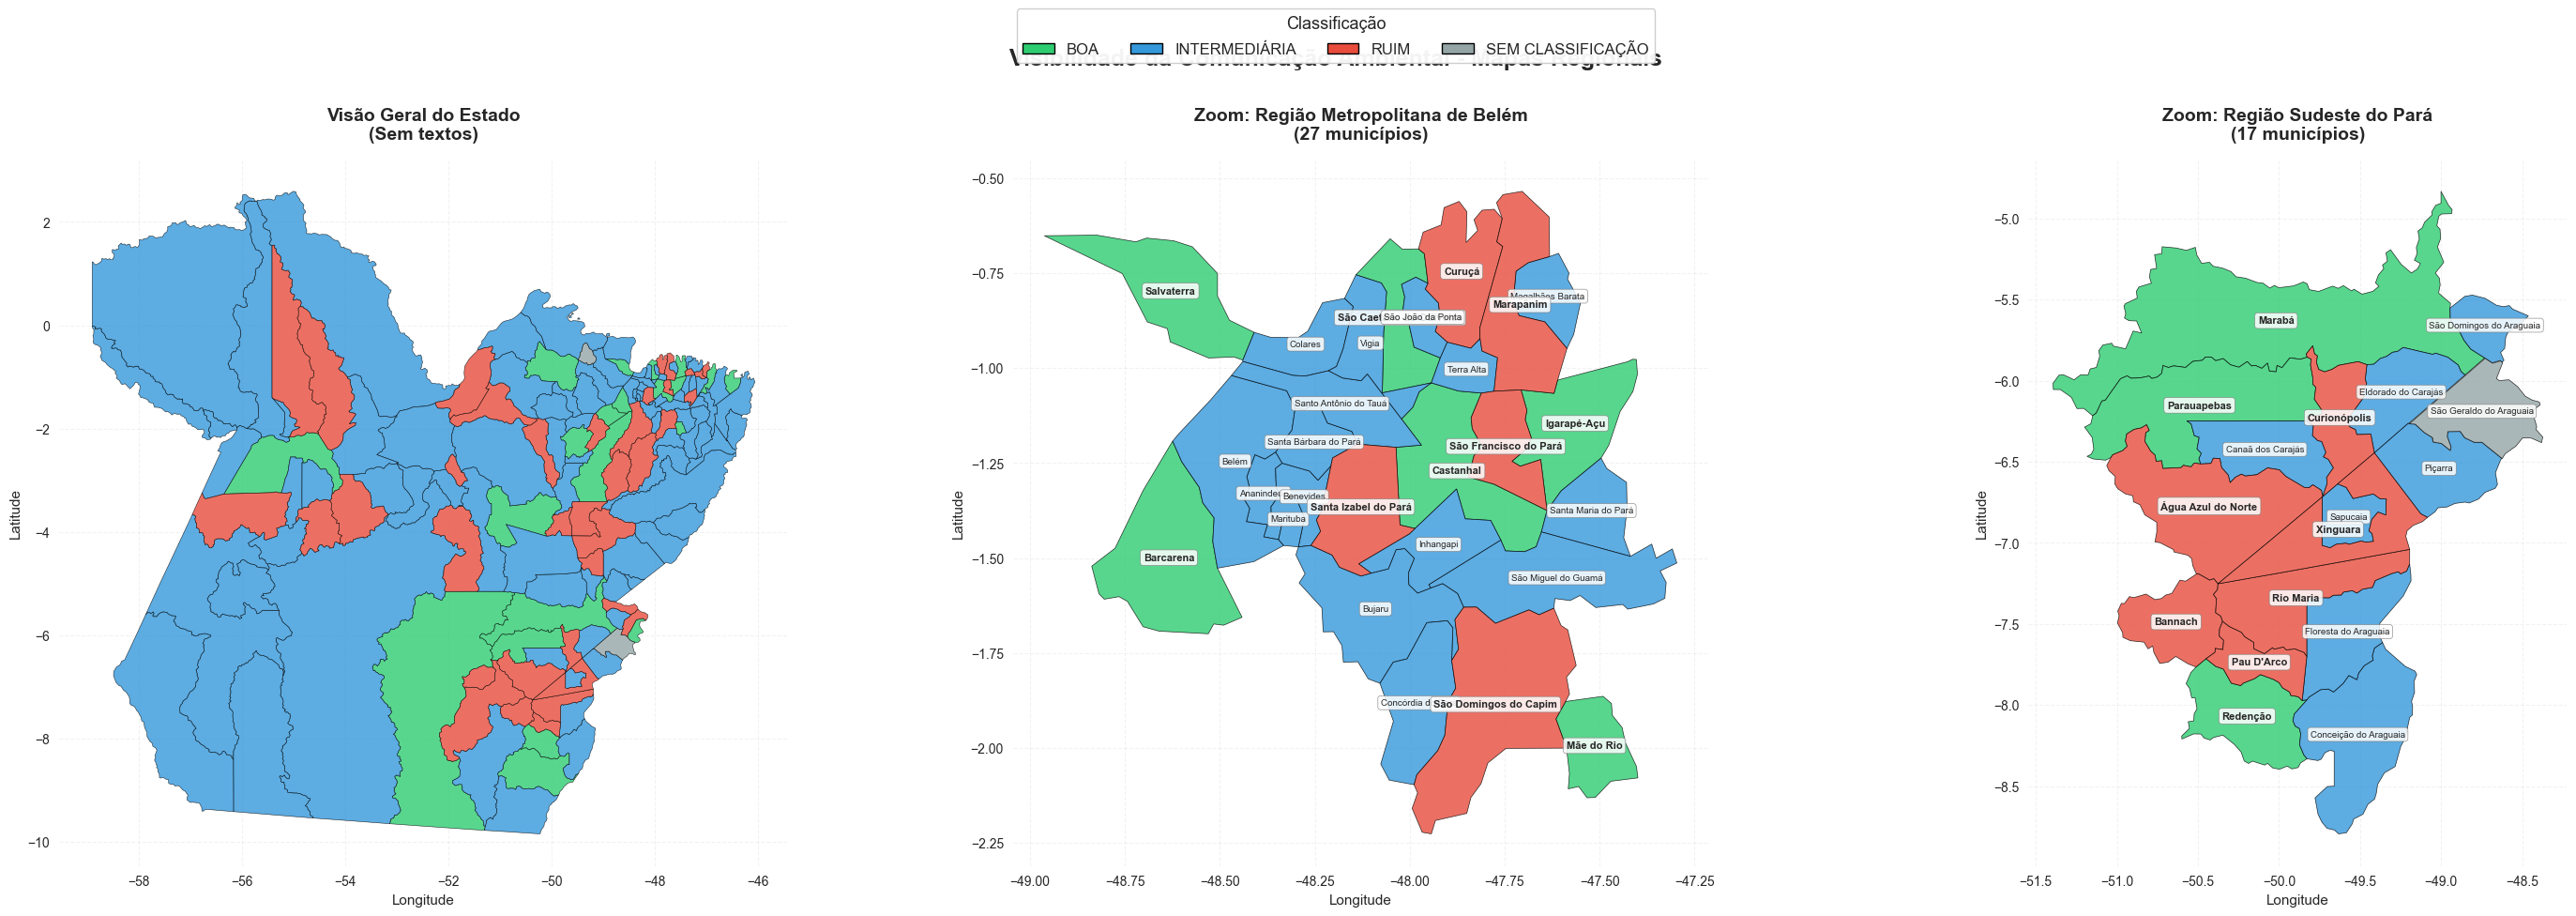

In [14]:
# SOLUÇÃO 3: Criar 3 mapas - Visão Geral + 2 Zooms de áreas densas
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Mapa 1: Visão Geral (sem textos)
for classificacao, cor in color_map.items():
    subset = gdf_completo[gdf_completo['Classificacao'] == classificacao]
    if len(subset) > 0:
        subset.plot(ax=axes[0], color=cor, edgecolor='black', linewidth=0.4, alpha=0.8)

axes[0].set_title('Visão Geral do Estado\n(Sem textos)', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Longitude', fontsize=11)
axes[0].set_ylabel('Latitude', fontsize=11)
axes[0].grid(True, alpha=0.25, linestyle='--')
axes[0].set_aspect('equal')

# Mapa 2: Zoom Região Metropolitana de Belém (alta densidade)
regiao_belem = gdf_completo[
    (gdf_completo.geometry.centroid.x > -48.8) & 
    (gdf_completo.geometry.centroid.x < -47.5) &
    (gdf_completo.geometry.centroid.y > -2.0) &
    (gdf_completo.geometry.centroid.y < -0.5)
]

for classificacao, cor in color_map.items():
    subset = regiao_belem[regiao_belem['Classificacao'] == classificacao]
    if len(subset) > 0:
        subset.plot(ax=axes[1], color=cor, edgecolor='black', linewidth=0.5, alpha=0.8)

# Adicionar textos na região de Belém
for idx, row in regiao_belem.iterrows():
    centroid = row['geometry'].centroid
    fontsize = 8 if row['Classificacao'] in ['BOA', 'RUIM'] else 7
    fontweight = 'bold' if row['Classificacao'] in ['BOA', 'RUIM'] else 'normal'
    
    axes[1].annotate(text=row['Municipio'], 
                     xy=(centroid.x, centroid.y),
                     fontsize=fontsize, 
                     fontweight=fontweight,
                     ha='center', 
                     va='center',
                     bbox=dict(boxstyle='round,pad=0.3', 
                              facecolor='white', 
                              edgecolor='gray',
                              linewidth=0.5,
                              alpha=0.85))

axes[1].set_title(f'Zoom: Região Metropolitana de Belém\n({len(regiao_belem)} municípios)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Longitude', fontsize=11)
axes[1].set_ylabel('Latitude', fontsize=11)
axes[1].grid(True, alpha=0.25, linestyle='--')
axes[1].set_aspect('equal')

# Mapa 3: Zoom Região Sudeste do Pará
regiao_sudeste = gdf_completo[
    (gdf_completo.geometry.centroid.x > -51.0) & 
    (gdf_completo.geometry.centroid.x < -48.5) &
    (gdf_completo.geometry.centroid.y > -8.5) &
    (gdf_completo.geometry.centroid.y < -5.5)
]

for classificacao, cor in color_map.items():
    subset = regiao_sudeste[regiao_sudeste['Classificacao'] == classificacao]
    if len(subset) > 0:
        subset.plot(ax=axes[2], color=cor, edgecolor='black', linewidth=0.5, alpha=0.8)

# Adicionar textos na região sudeste
for idx, row in regiao_sudeste.iterrows():
    centroid = row['geometry'].centroid
    fontsize = 8 if row['Classificacao'] in ['BOA', 'RUIM'] else 7
    fontweight = 'bold' if row['Classificacao'] in ['BOA', 'RUIM'] else 'normal'
    
    axes[2].annotate(text=row['Municipio'], 
                     xy=(centroid.x, centroid.y),
                     fontsize=fontsize, 
                     fontweight=fontweight,
                     ha='center', 
                     va='center',
                     bbox=dict(boxstyle='round,pad=0.3', 
                              facecolor='white', 
                              edgecolor='gray',
                              linewidth=0.5,
                              alpha=0.85))

axes[2].set_title(f'Zoom: Região Sudeste do Pará\n({len(regiao_sudeste)} municípios)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[2].set_xlabel('Longitude', fontsize=11)
axes[2].set_ylabel('Latitude', fontsize=11)
axes[2].grid(True, alpha=0.25, linestyle='--')
axes[2].set_aspect('equal')

# Remover spines
for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(False)

# Adicionar legenda geral
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='BOA'),
    Patch(facecolor='#3498db', edgecolor='black', label='INTERMEDIÁRIA'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='RUIM'),
    Patch(facecolor='#95a5a6', edgecolor='black', label='SEM CLASSIFICAÇÃO')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=4, fontsize=12, 
           title='Classificação', title_fontsize=13, framealpha=0.95, bbox_to_anchor=(0.5, 0.98))

fig.suptitle('Visibilidade da Comunicação Ambiental - Mapas Regionais', 
             fontsize=18, fontweight='bold', y=0.93)

plt.tight_layout(rect=[0, 0, 1, 0.92])

# Salvar
output_path = r'c:\Users\flord\OneDrive\Documentos\mapa para\mapa_solucao3_zoom_regioes.png'
plt.savefig(output_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"✅ Solução 3 salva em: mapa_solucao3_zoom_regioes.png")
print(f"📊 Região Belém: {len(regiao_belem)} municípios")
print(f"📊 Região Sudeste: {len(regiao_sudeste)} municípios")
plt.show()

#### Solução 4: Mapa Interativo Aprimorado (Sem sobreposição)

✅ Solução 4 salva em: mapa_solucao4_limpo_marcadores.png
💡 Dica: Este mapa é ideal para apresentações e relatórios impressos


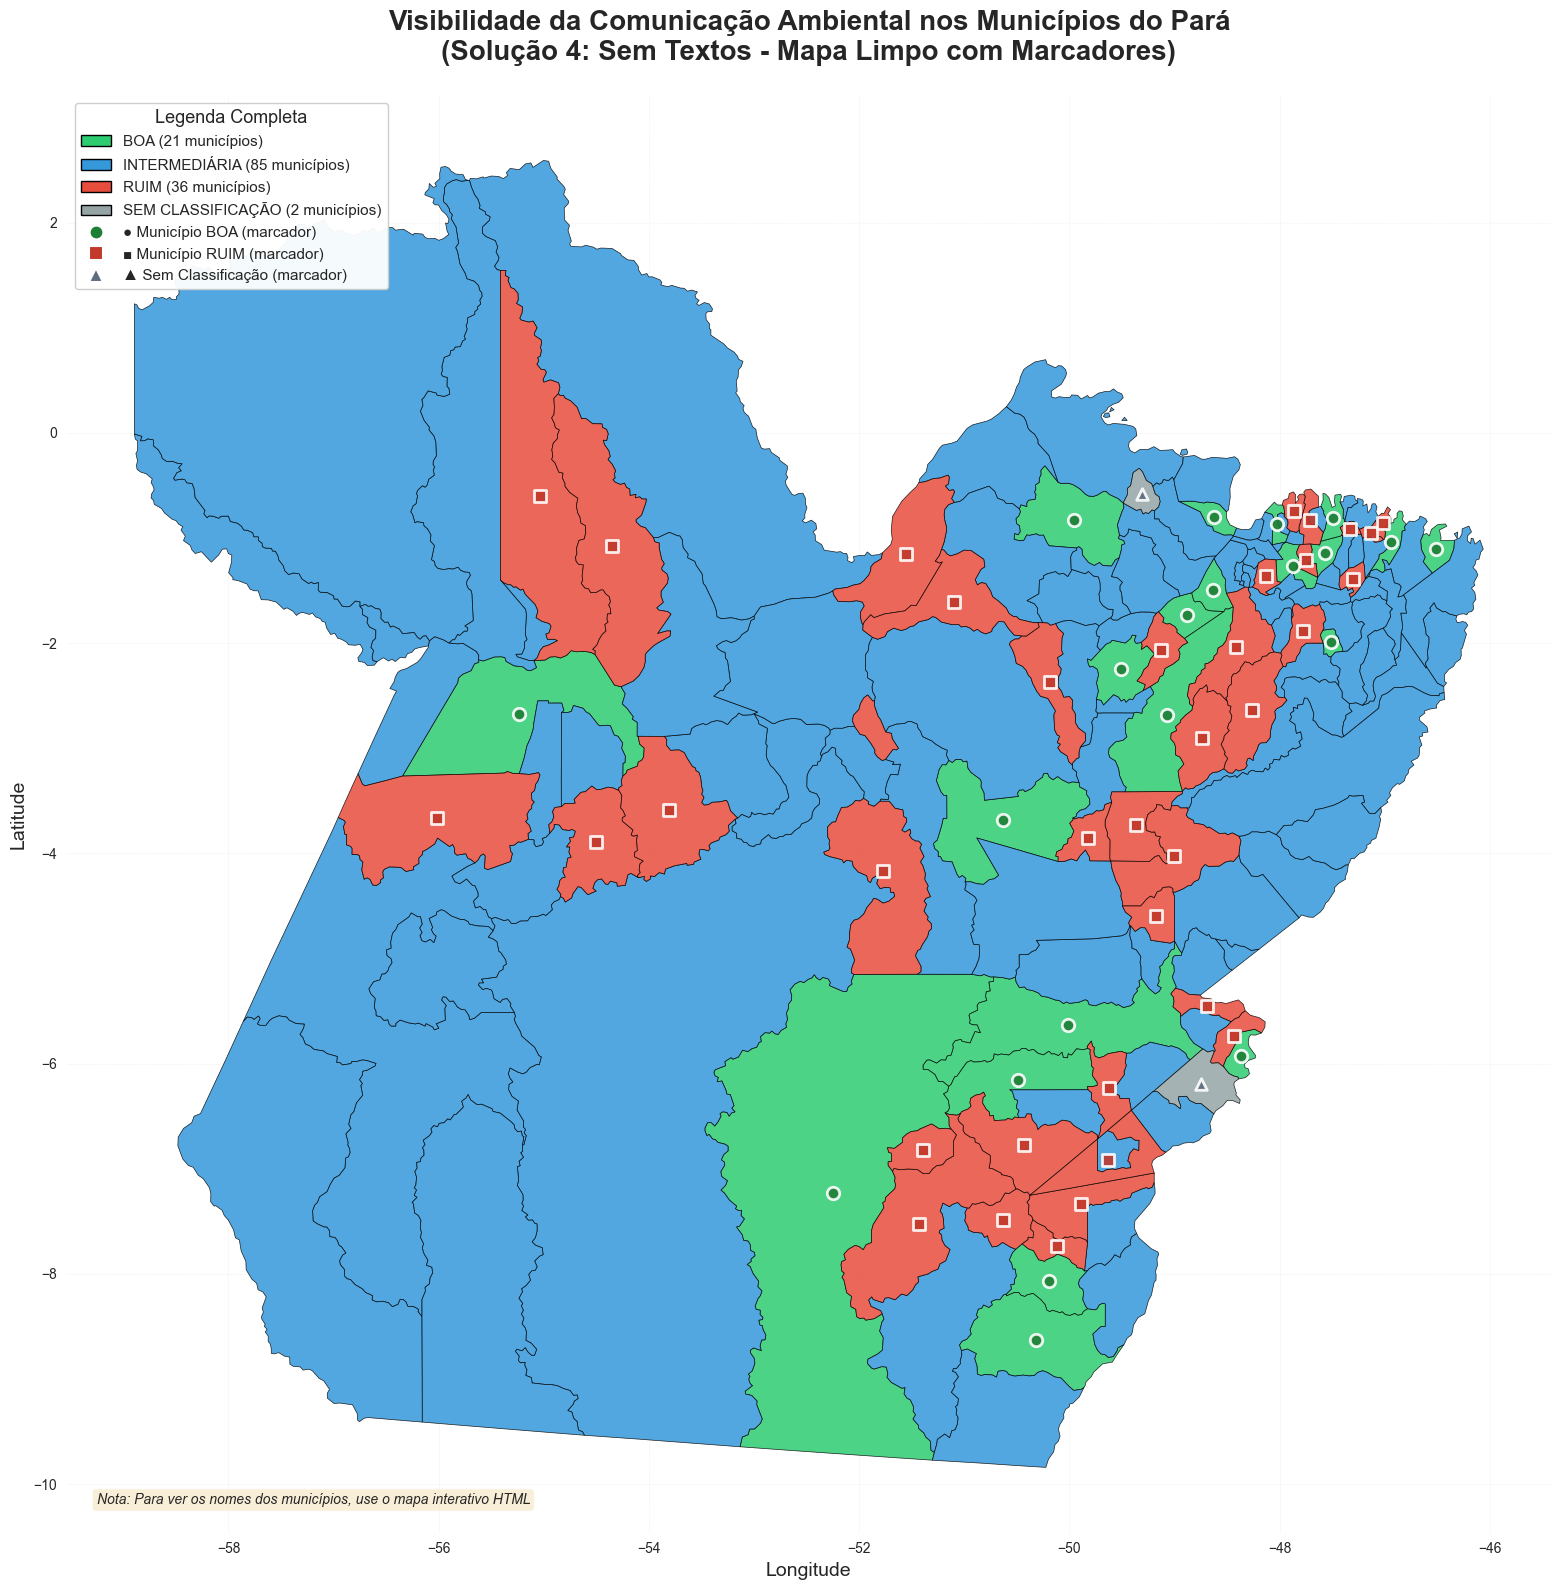

In [13]:
# SOLUÇÃO 4: Mapa sem textos fixos - Use tooltips e popups interativos
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

# Plotar municípios SEM textos
for classificacao, cor in color_map.items():
    subset = gdf_completo[gdf_completo['Classificacao'] == classificacao]
    if len(subset) > 0:
        subset.plot(ax=ax, color=cor, edgecolor='black', linewidth=0.5, alpha=0.85, label=classificacao)

# Adicionar apenas marcadores para municípios BOA e RUIM
prioritarios = gdf_completo[gdf_completo['Classificacao'].isin(['BOA', 'RUIM', 'SEM CLASSIFICAÇÃO'])]

for idx, row in prioritarios.iterrows():
    centroid = row['geometry'].centroid
    
    if row['Classificacao'] == 'BOA':
        marker = 'o'
        color = '#1e7e34'
        size = 80
    elif row['Classificacao'] == 'RUIM':
        marker = 's'
        color = '#c0392b'
        size = 70
    else:
        marker = '^'
        color = '#5d6d7e'
        size = 70
    
    ax.scatter(centroid.x, centroid.y, marker=marker, s=size, 
              color=color, edgecolor='white', linewidth=2, zorder=5, alpha=0.9)

# Configurações
ax.set_title('Visibilidade da Comunicação Ambiental nos Municípios do Pará\n(Solução 4: Sem Textos - Mapa Limpo com Marcadores)', 
             fontsize=20, fontweight='bold', pad=25)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Legenda detalhada
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='BOA (21 municípios)'),
    Patch(facecolor='#3498db', edgecolor='black', label='INTERMEDIÁRIA (85 municípios)'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='RUIM (36 municípios)'),
    Patch(facecolor='#95a5a6', edgecolor='black', label='SEM CLASSIFICAÇÃO (2 municípios)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#1e7e34', markersize=10, 
           label='● Município BOA (marcador)', markeredgecolor='white', markeredgewidth=1.5),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#c0392b', markersize=10, 
           label='■ Município RUIM (marcador)', markeredgecolor='white', markeredgewidth=1.5),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='#5d6d7e', markersize=10, 
           label='▲ Sem Classificação (marcador)', markeredgecolor='white', markeredgewidth=1.5)
]

ax.legend(handles=legend_elements, loc='upper left', fontsize=11, 
          title='Legenda Completa', title_fontsize=13, framealpha=0.95)
ax.set_aspect('equal')
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

# Adicionar nota
ax.text(0.02, 0.02, 'Nota: Para ver os nomes dos municípios, use o mapa interativo HTML', 
        transform=ax.transAxes, fontsize=10, style='italic', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

# Salvar
output_path = r'c:\Users\flord\OneDrive\Documentos\mapa para\mapa_solucao4_limpo_marcadores.png'
plt.savefig(output_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"✅ Solução 4 salva em: mapa_solucao4_limpo_marcadores.png")
print(f"💡 Dica: Este mapa é ideal para apresentações e relatórios impressos")
plt.show()

### 📊 Comparação das Soluções

| Solução | Vantagens | Desvantagens | Melhor Para |
|---------|-----------|--------------|-------------|
| **1. Ajuste Automático** | Todos os nomes visíveis; Evita sobreposição | Pode ficar congestionado; Processamento lento | Análises completas |
| **2. Municípios Prioritários** | Foco em áreas críticas; Limpo e claro | Não mostra todos os municípios | Relatórios executivos |
| **3. Zoom em Regiões** | Detalhamento regional; Múltiplas perspectivas | Ocupa mais espaço | Apresentações técnicas |
| **4. Mapa Limpo** | Visual profissional; Sem poluição visual | Requer legenda/referência externa | Publicações e relatórios |

### 💡 Recomendação Profissional

**Para apresentações executivas:** Use **Solução 2 ou 4**
**Para análise técnica completa:** Use **Solução 1**
**Para relatórios regionais:** Use **Solução 3**
**Para o mapa interativo:** Continue usando o HTML (sem problemas de sobreposição)

In [16]:
import subprocess
import os

print("=" * 80)
print("🔍 VERIFICANDO INSTALAÇÃO DO GIT")
print("=" * 80)

try:
    # Verificar se Git está instalado
    result = subprocess.run(['git', '--version'], 
                          capture_output=True, 
                          text=True, 
                          shell=True)
    
    if result.returncode == 0:
        print(f"✅ Git instalado: {result.stdout.strip()}")
        
        # Verificar se já existe repositório Git
        os.chdir(r'c:\Users\flord\OneDrive\Documentos\mapa para')
        
        if os.path.exists('.git'):
            print("✅ Repositório Git já existe nesta pasta")
            
            # Verificar status
            status_result = subprocess.run(['git', 'status', '--short'], 
                                         capture_output=True, 
                                         text=True, 
                                         shell=True)
            print("\n📊 Status atual do repositório:")
            if status_result.stdout.strip():
                print(status_result.stdout)
            else:
                print("   Nenhuma alteração pendente")
                
        else:
            print("ℹ️  Repositório Git ainda não foi inicializado")
            print("\n📋 Execute o próximo código para inicializar!")
            
    else:
        print("❌ Git não está instalado")
        print("\n📥 Para instalar o Git:")
        print("   1. Acesse: https://git-scm.com/download/win")
        print("   2. Baixe e instale o Git for Windows")
        print("   3. Reinicie o VS Code após a instalação")
        
except FileNotFoundError:
    print("❌ Git não encontrado no sistema")
    print("\n📥 Para instalar o Git:")
    print("   1. Acesse: https://git-scm.com/download/win")
    print("   2. Baixe e instale o Git for Windows")
    print("   3. Reinicie o VS Code após a instalação")
    
print("=" * 80)

🔍 VERIFICANDO INSTALAÇÃO DO GIT
✅ Git instalado: git version 2.51.0.windows.1
ℹ️  Repositório Git ainda não foi inicializado

📋 Execute o próximo código para inicializar!


### 🚀 Passo 2: Criar Repositório no GitHub (Interface Web)

**Antes de executar os comandos abaixo, faça isso no navegador:**

1. 🌐 Acesse: https://github.com
2. 🔐 Faça login na sua conta (ou crie uma conta gratuita)
3. ➕ Clique no botão **"+"** no canto superior direito
4. 📦 Selecione **"New repository"**
5. 📝 Preencha os dados:
   - **Repository name:** `mapa-para-ambiental` (ou outro nome de sua preferência)
   - **Description:** "Mapa de Visibilidade da Comunicação Ambiental - Municípios do Pará"
   - ✅ Marque como **Public** (para funcionar com GitHub Pages gratuito)
   - ❌ **NÃO** marque "Add a README file"
   - ❌ **NÃO** adicione .gitignore ou license
6. 🎯 Clique em **"Create repository"**

**Copie a URL do repositório que aparecerá na próxima página** (algo como: `https://github.com/SEU_USUARIO/mapa-para-ambiental.git`)

### 💻 Passo 3: Configurar e Publicar via Terminal

Execute os comandos abaixo no terminal (PowerShell) ou execute a célula Python automatizada.

In [17]:
import subprocess
import os

print("=" * 80)
print("🚀 CONFIGURAÇÃO AUTOMÁTICA DO GIT E PUBLICAÇÃO")
print("=" * 80)

# Solicitar URL do repositório
print("\n📝 Cole a URL do seu repositório GitHub:")
print("   Exemplo: https://github.com/SEU_USUARIO/mapa-para-ambiental.git")
repo_url = input("\n🔗 URL do repositório: ").strip()

if not repo_url:
    print("❌ URL não fornecida. Processo cancelado.")
else:
    print(f"\n✅ URL recebida: {repo_url}")
    
    # Solicitar nome e email (necessário para commits)
    print("\n📧 Configuração do Git:")
    git_name = input("   Seu nome: ").strip()
    git_email = input("   Seu email: ").strip()
    
    os.chdir(r'c:\Users\flord\OneDrive\Documentos\mapa para')
    
    commands = [
        f'git config --global user.name "{git_name}"',
        f'git config --global user.email "{git_email}"',
        'git init',
        'git add docs/',
        'git add *.csv',
        'git add *.ipynb',
        'git commit -m "Adicionar mapa interativo de comunicação ambiental do Pará"',
        'git branch -M main',
        f'git remote add origin {repo_url}',
        'git push -u origin main'
    ]
    
    print("\n" + "=" * 80)
    print("⚙️  EXECUTANDO COMANDOS GIT...")
    print("=" * 80)
    
    for i, cmd in enumerate(commands, 1):
        # Não mostrar o comando se contiver informações sensíveis
        if 'user.name' in cmd or 'user.email' in cmd:
            print(f"\n[{i}/{len(commands)}] Configurando usuário Git...")
        else:
            print(f"\n[{i}/{len(commands)}] {cmd}")
        
        result = subprocess.run(cmd, 
                              capture_output=True, 
                              text=True, 
                              shell=True)
        
        if result.returncode == 0:
            print(f"   ✅ Sucesso")
            if result.stdout.strip():
                print(f"   {result.stdout.strip()}")
        else:
            print(f"   ⚠️  Aviso/Erro:")
            if result.stderr.strip():
                print(f"   {result.stderr.strip()}")
    
    print("\n" + "=" * 80)
    print("🎉 PROCESSO CONCLUÍDO!")
    print("=" * 80)
    print("\n📋 PRÓXIMOS PASSOS:")
    print("   1. Acesse seu repositório no GitHub")
    print("   2. Vá em: Settings > Pages")
    print("   3. Em 'Source', selecione: Branch: main, Folder: /docs")
    print("   4. Clique em 'Save'")
    print("   5. Aguarde 2-3 minutos")
    print(f"   6. Acesse: https://{git_name}.github.io/{repo_url.split('/')[-1].replace('.git', '')}/")
    print("\n   Ou procure o link na aba Pages do seu repositório!")
    print("=" * 80)

🚀 CONFIGURAÇÃO AUTOMÁTICA DO GIT E PUBLICAÇÃO

📝 Cole a URL do seu repositório GitHub:
   Exemplo: https://github.com/SEU_USUARIO/mapa-para-ambiental.git

✅ URL recebida: https://github.com/noamcoelho/mapa-para-ambiental.git

📧 Configuração do Git:

✅ URL recebida: https://github.com/noamcoelho/mapa-para-ambiental.git

📧 Configuração do Git:

⚙️  EXECUTANDO COMANDOS GIT...

[1/10] Configurando usuário Git...
   ✅ Sucesso

[2/10] Configurando usuário Git...
   ✅ Sucesso

[3/10] git init
   ✅ Sucesso
   Initialized empty Git repository in C:/Users/flord/OneDrive/Documentos/mapa para/.git/

[4/10] git add docs/
   ✅ Sucesso

[5/10] git add *.csv

⚙️  EXECUTANDO COMANDOS GIT...

[1/10] Configurando usuário Git...
   ✅ Sucesso

[2/10] Configurando usuário Git...
   ✅ Sucesso

[3/10] git init
   ✅ Sucesso
   Initialized empty Git repository in C:/Users/flord/OneDrive/Documentos/mapa para/.git/

[4/10] git add docs/
   ✅ Sucesso

[5/10] git add *.csv
   ✅ Sucesso

[6/10] git add *.ipynb
   ✅ 

### 🌐 Passo 4: Ativar GitHub Pages

**Depois de fazer o push, configure o GitHub Pages:**

1. 🌐 No seu repositório do GitHub, clique em **"Settings"** (aba no topo)
2. 📄 No menu lateral esquerdo, clique em **"Pages"**
3. ⚙️ Em **"Source"**, configure:
   - **Branch:** `main`
   - **Folder:** `/docs`
4. 💾 Clique em **"Save"**
5. ⏳ Aguarde 2-3 minutos para o site ser publicado
6. 🎉 O link do site aparecerá no topo da página!

**Seu mapa estará disponível em:**
```
https://SEU_USUARIO.github.io/mapa-para-ambiental/
```

---

### ✅ Checklist Final

- [ ] Git instalado
- [ ] Repositório criado no GitHub
- [ ] Arquivos enviados (push)
- [ ] GitHub Pages ativado
- [ ] Site publicado e acessível
- [ ] Link compartilhado com outras pessoas

### 📱 Compartilhamento

Depois de publicado, você pode compartilhar o link do GitHub Pages:
- ✉️ Por email
- 💬 WhatsApp/Telegram
- 📱 Redes sociais
- 📊 Em relatórios e apresentações

**O mapa será acessível de qualquer dispositivo com internet!** 🌍

### 🔄 Atualizar URL do Repositório GitHub

In [ ]:
import subprocess
import os

print("=" * 80)
print("🔄 ATUALIZAR URL DO REPOSITÓRIO GITHUB")
print("=" * 80)

os.chdir(r'c:\Users\flord\OneDrive\Documentos\mapa para')

# Verificar URL atual
result = subprocess.run(['git', 'remote', 'get-url', 'origin'], 
                       capture_output=True, 
                       text=True, 
                       shell=True)

if result.returncode == 0:
    print(f"\n📍 URL atual: {result.stdout.strip()}")
    
    print("\n📝 Digite a NOVA URL do seu repositório GitHub:")
    print("   Exemplo: https://github.com/SEU_NOVO_USUARIO/novo-nome-repo.git")
    new_url = input("\n🔗 Nova URL: ").strip()
    
    if new_url:
        # Atualizar URL remota
        update_result = subprocess.run(['git', 'remote', 'set-url', 'origin', new_url], 
                                      capture_output=True, 
                                      text=True, 
                                      shell=True)
        
        if update_result.returncode == 0:
            print(f"\n✅ URL atualizada com sucesso!")
            print(f"   Nova URL: {new_url}")
            
            # Fazer push para o novo repositório
            print("\n🚀 Fazendo push para o novo repositório...")
            push_result = subprocess.run(['git', 'push', '-u', 'origin', 'main'], 
                                        capture_output=True, 
                                        text=True, 
                                        shell=True)
            
            if push_result.returncode == 0:
                print("✅ Push realizado com sucesso!")
            else:
                print("⚠️  Aviso ao fazer push:")
                print(push_result.stderr if push_result.stderr else push_result.stdout)
        else:
            print("❌ Erro ao atualizar URL")
            print(update_result.stderr)
    else:
        print("❌ URL não fornecida. Operação cancelada.")
else:
    print("❌ Repositório Git não encontrado ou não configurado")
    print("   Execute primeiro a célula de configuração do Git")

print("=" * 80)

### 📱 Gerar QR Code para o GitHub Pages

In [18]:
# Instalar biblioteca para gerar QR Code
import sys
!{sys.executable} -m pip install qrcode[pil] --quiet

print("✅ Biblioteca qrcode instalada!")

✅ Biblioteca qrcode instalada!


📱 GERAR QR CODE DO GITHUB PAGES

📝 Digite a URL do seu GitHub Pages:
   Exemplo: https://noamcoelho.github.io/mapa-para-ambiental/


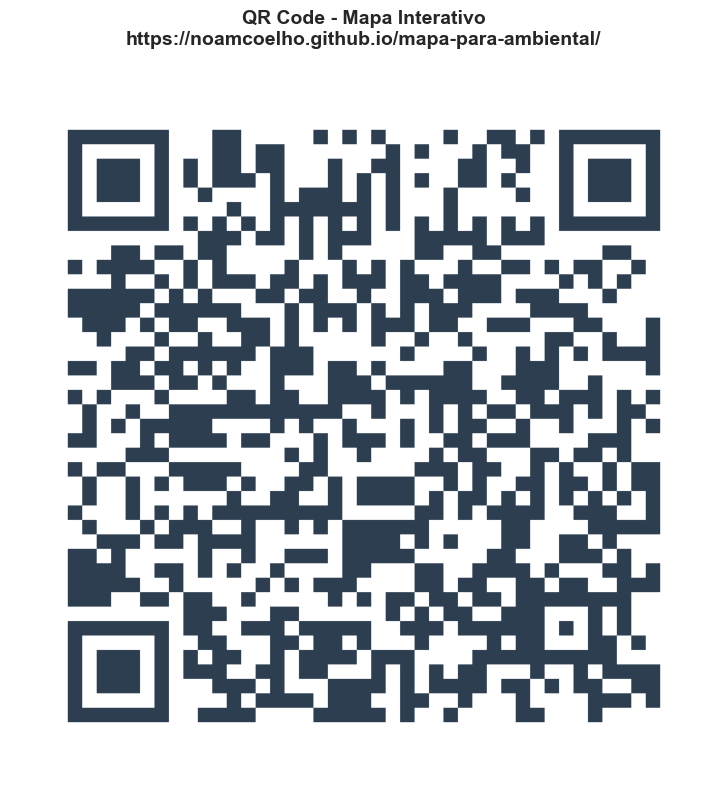


✅ QR Code gerado com sucesso!
📁 Salvo em: c:\Users\flord\OneDrive\Documentos\mapa para\qrcode_mapa_para.png
📁 Versão com título: c:\Users\flord\OneDrive\Documentos\mapa para\qrcode_mapa_para_com_titulo.png

🔗 URL do QR Code: https://noamcoelho.github.io/mapa-para-ambiental/

💡 Compartilhe este QR Code em apresentações, relatórios ou redes sociais!


In [21]:
import qrcode
from PIL import Image
import matplotlib.pyplot as plt

print("=" * 80)
print("📱 GERAR QR CODE DO GITHUB PAGES")
print("=" * 80)

# Solicitar URL do GitHub Pages
print("\n📝 Digite a URL do seu GitHub Pages:")
print("   Exemplo: https://noamcoelho.github.io/mapa-para-ambiental/")
github_pages_url = input("\n🔗 URL do GitHub Pages: ").strip()

if github_pages_url:
    # Criar QR Code
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=10,
        border=4,
    )
    
    qr.add_data(github_pages_url)
    qr.make(fit=True)
    
    # Criar imagem do QR Code
    img = qr.make_image(fill_color="#2c3e50", back_color="white")
    
    # Salvar QR Code
    qr_path = r'c:\Users\flord\OneDrive\Documentos\mapa para\qrcode_mapa_para.png'
    img.save(qr_path)
    
    # Exibir QR Code
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'QR Code - Mapa Interativo\n{github_pages_url}', 
                 fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig(qr_path.replace('.png', '_com_titulo.png'), dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    print(f"\n✅ QR Code gerado com sucesso!")
    print(f"📁 Salvo em: {qr_path}")
    print(f"📁 Versão com título: {qr_path.replace('.png', '_com_titulo.png')}")
    print(f"\n🔗 URL do QR Code: {github_pages_url}")
    print("\n💡 Compartilhe este QR Code em apresentações, relatórios ou redes sociais!")
    
else:
    print("❌ URL não fornecida. Processo cancelado.")

print("=" * 80)

### 🎨 Mapa Estático com Novas Cores e Todos os Nomes

**Nova paleta de cores:**
- 🟢 **Verde** = BOA
- 🟡 **Amarelo** = INTERMEDIÁRIA  
- 🔴 **Vermelho** = RUIM
- 🔵 **Azul** = SEM CLASSIFICAÇÃO

📝 Adicionando nomes de todos os municípios...

✅ Mapa com nova paleta de cores salvo em:
   c:\Users\flord\OneDrive\Documentos\mapa para\mapa_comunicacao_ambiental_nova_paleta.png

🎨 Nova paleta aplicada:
   🟢 Verde = BOA
   🟡 Amarelo = INTERMEDIÁRIA
   🔴 Vermelho = RUIM
   🔵 Azul = SEM CLASSIFICAÇÃO


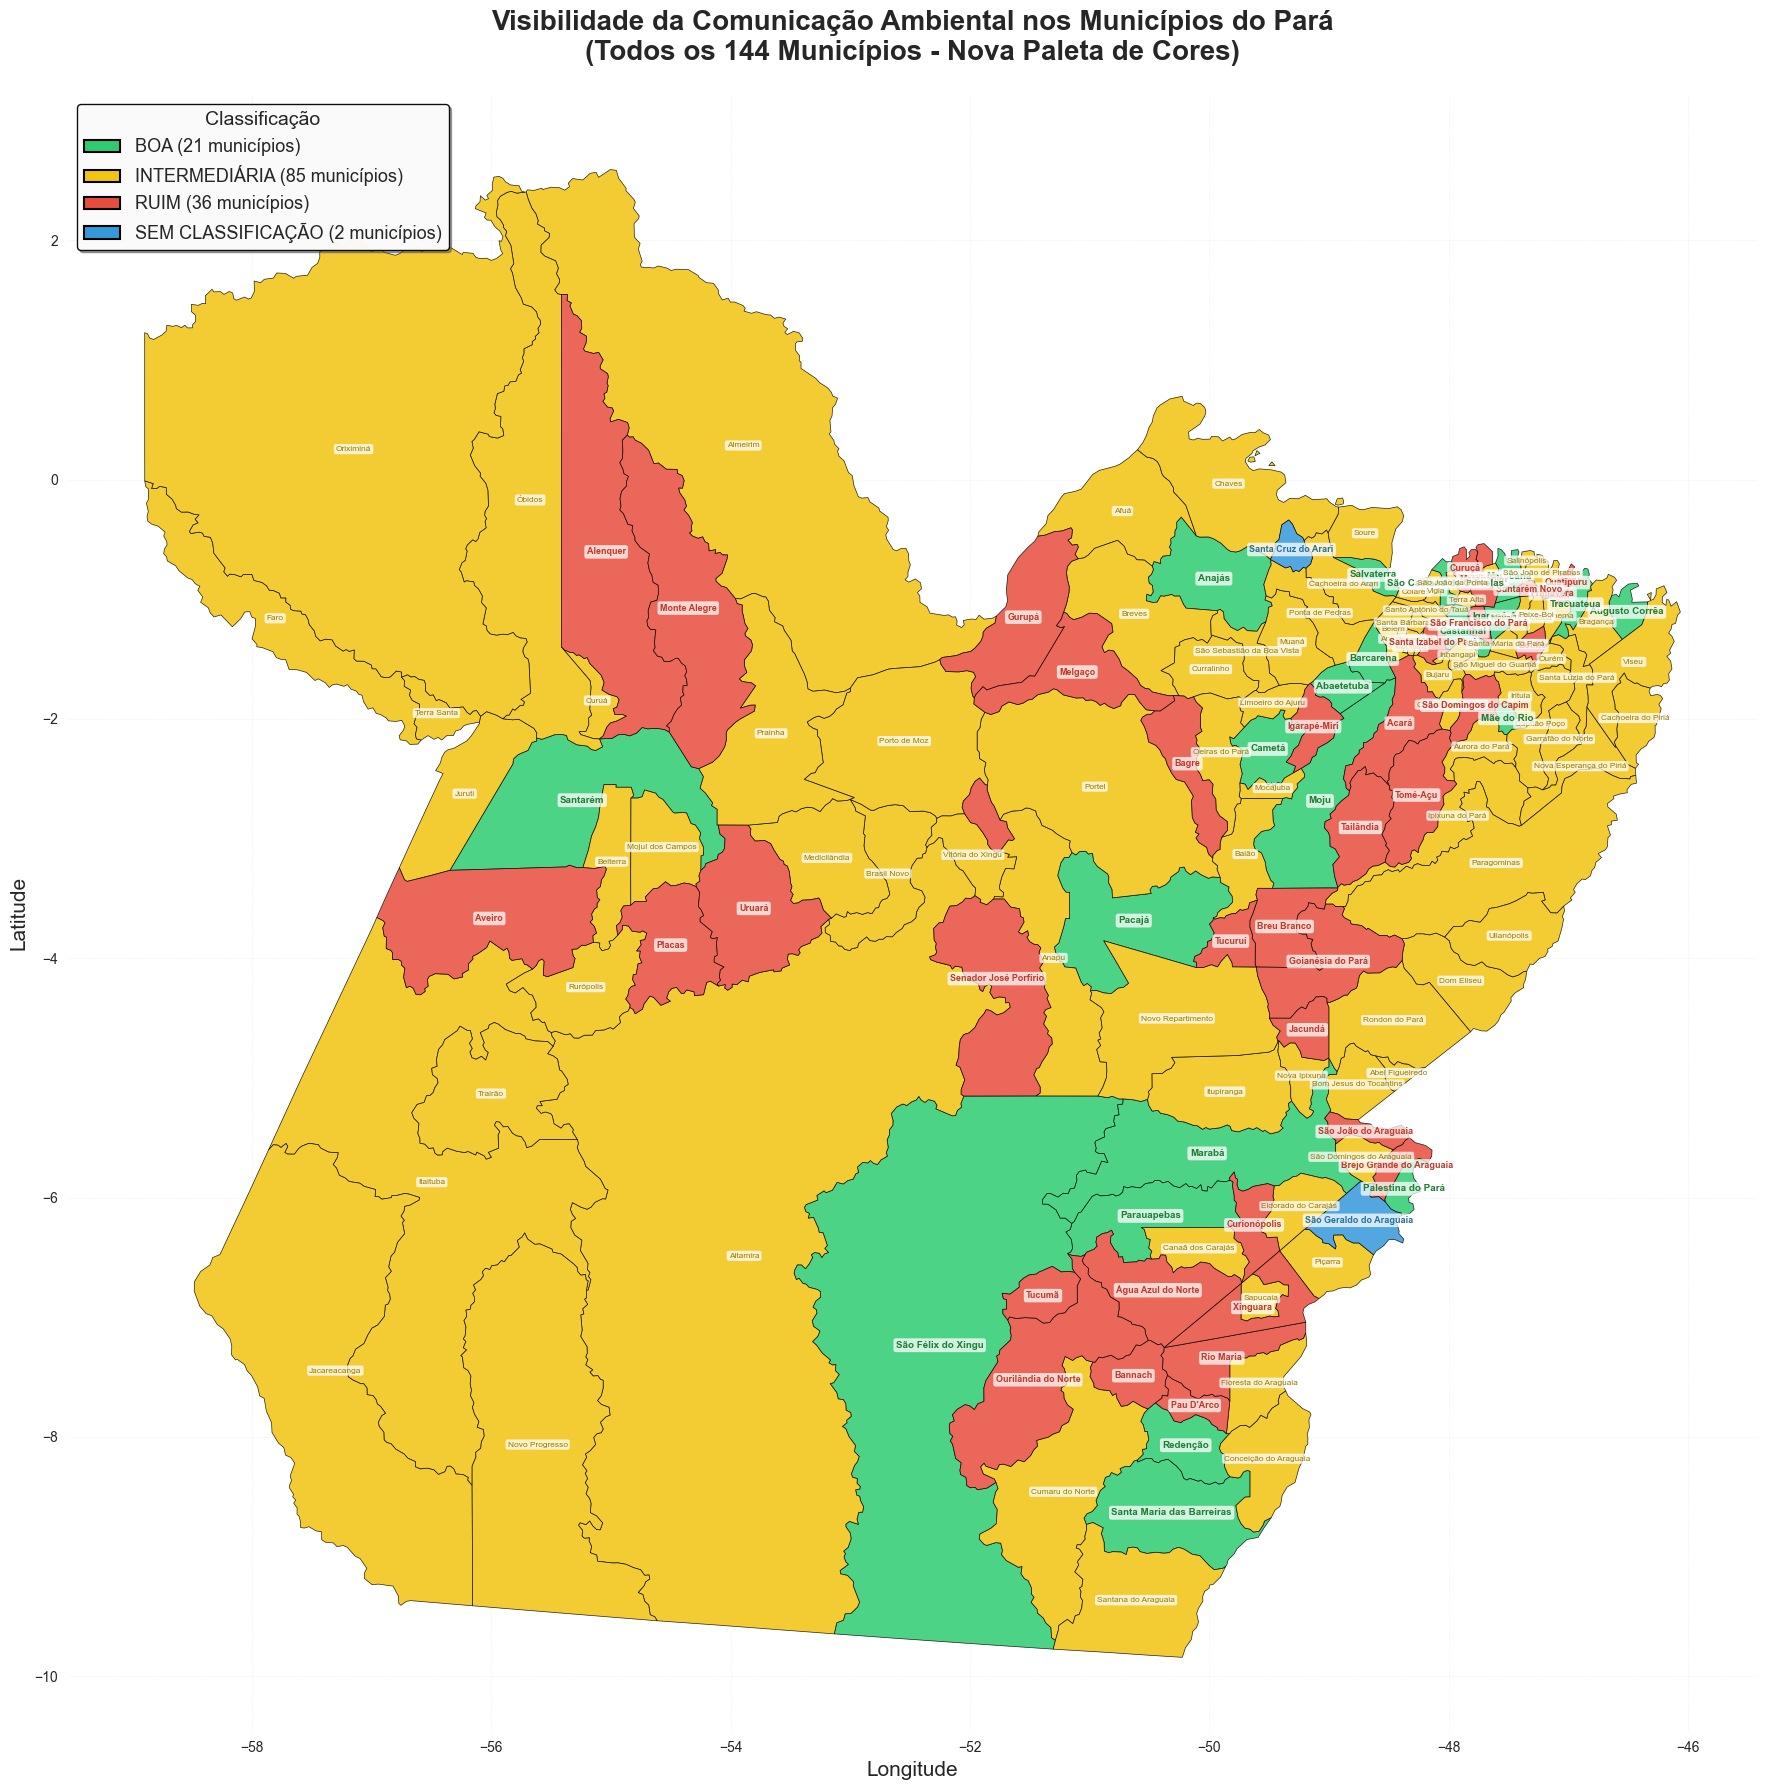

In [20]:
# Mapa estático com NOVA paleta de cores e todos os nomes
fig, ax = plt.subplots(1, 1, figsize=(24, 18))

# NOVA paleta de cores
new_color_map = {
    'BOA': '#2ecc71',              # Verde
    'INTERMEDIÁRIA': '#f1c40f',    # Amarelo
    'RUIM': '#e74c3c',             # Vermelho
    'SEM CLASSIFICAÇÃO': '#3498db', # Azul
    'SEM DADOS': '#95a5a6'         # Cinza
}

# Plotar cada classificação com a nova cor
for classificacao, cor in new_color_map.items():
    subset = gdf_completo[gdf_completo['Classificacao'] == classificacao]
    if len(subset) > 0:
        subset.plot(ax=ax, color=cor, edgecolor='black', linewidth=0.5, alpha=0.85, label=classificacao)

# Adicionar TODOS os nomes dos municípios
print("📝 Adicionando nomes de todos os municípios...")
for idx, row in gdf_completo.iterrows():
    centroid = row['geometry'].centroid
    
    # Ajustar estilo baseado na classificação
    if row['Classificacao'] == 'BOA':
        fontsize = 7
        fontweight = 'bold'
        color = '#1e7e34'  # Verde escuro
    elif row['Classificacao'] == 'RUIM':
        fontsize = 6.5
        fontweight = 'bold'
        color = '#c0392b'  # Vermelho escuro
    elif row['Classificacao'] == 'SEM CLASSIFICAÇÃO':
        fontsize = 6.5
        fontweight = 'bold'
        color = '#2471a3'  # Azul escuro
    else:  # INTERMEDIÁRIA
        fontsize = 6
        fontweight = 'normal'
        color = '#9a7d0a'  # Amarelo escuro
    
    ax.annotate(text=row['Municipio'], 
                xy=(centroid.x, centroid.y),
                fontsize=fontsize, 
                fontweight=fontweight,
                color=color,
                ha='center', 
                va='center',
                bbox=dict(boxstyle='round,pad=0.25', 
                         facecolor='white', 
                         edgecolor='none', 
                         alpha=0.75))

# Configurações do mapa
ax.set_title('Visibilidade da Comunicação Ambiental nos Municípios do Pará\n(Todos os 144 Municípios - Nova Paleta de Cores)', 
             fontsize=20, fontweight='bold', pad=25)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)

# Criar legenda com as novas cores
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='BOA (21 municípios)', linewidth=1.5),
    Patch(facecolor='#f1c40f', edgecolor='black', label='INTERMEDIÁRIA (85 municípios)', linewidth=1.5),
    Patch(facecolor='#e74c3c', edgecolor='black', label='RUIM (36 municípios)', linewidth=1.5),
    Patch(facecolor='#3498db', edgecolor='black', label='SEM CLASSIFICAÇÃO (2 municípios)', linewidth=1.5)
]

ax.legend(handles=legend_elements, 
          loc='upper left', 
          fontsize=13, 
          title='Classificação', 
          title_fontsize=14, 
          framealpha=0.95,
          edgecolor='black',
          fancybox=True,
          shadow=True)

ax.set_aspect('equal')
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)

# Remover spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Salvar com novo nome
output_path = r'c:\Users\flord\OneDrive\Documentos\mapa para\mapa_comunicacao_ambiental_nova_paleta.png'
plt.savefig(output_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"\n✅ Mapa com nova paleta de cores salvo em:")
print(f"   {output_path}")
print(f"\n🎨 Nova paleta aplicada:")
print(f"   🟢 Verde = BOA")
print(f"   🟡 Amarelo = INTERMEDIÁRIA")
print(f"   🔴 Vermelho = RUIM")
print(f"   🔵 Azul = SEM CLASSIFICAÇÃO")
plt.show()